# Make a house

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# method 1
house = np.array([[0, 5], [5, 5], [5, 0], [0, 0], [0, 5], [2.5, 7], [5, 5], [0, 5]])

In [3]:
# method 2
x = np.array([0. , 5. , 5. , 0. , 0. , 2.5, 5. , 0. ])
y = np.array([5., 5., 0., 0., 5., 7., 5., 5.])
house = np.stack((x, y))

In [4]:
house

array([[0. , 5. , 5. , 0. , 0. , 2.5, 5. , 0. ],
       [5. , 5. , 0. , 0. , 5. , 7. , 5. , 5. ]])

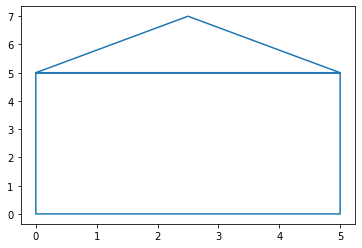

In [5]:
plt.plot(house[0, :], house[1, :])

# Make a second house from the first one
Offset by $r=(10, 1)$

In [6]:
r = np.array((10, 1))  # offset

In [7]:
r = r[:,None]  # add a singleton dimension to match the dimensionality of house

In [8]:
house2 = house + r

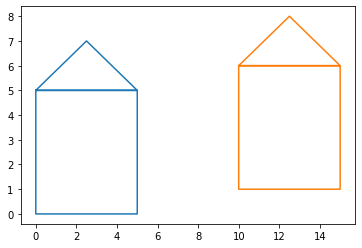

In [9]:
plt.plot(house[0, :], house[1, :])
plt.plot(house2[0, :], house2[1, :])

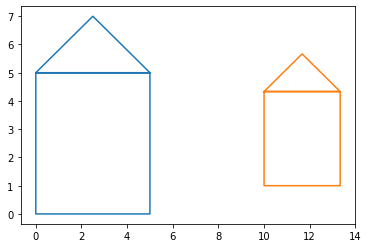

In [10]:
house3 = house / 1.5 + r

plt.plot(house[0, :], house[1, :])
plt.plot(house3[0, :], house3[1, :])

In [11]:
angle = 20 / 180 * np.pi
rot = np.array([
    [np.cos(angle), np.sin(angle)], 
    [-np.sin(angle), np.cos(angle)]
])

In [12]:
rot.shape

(2, 2)

In [13]:
house.shape

(2, 8)

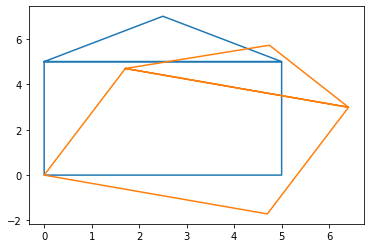

In [14]:
house4 = np.dot(rot, house)
house4 = rot @ house

plt.plot(house[0, :], house[1, :])
plt.plot(house4[0, :], house4[1, :])

In [16]:
house4 = rot @ house / 1.5 + r

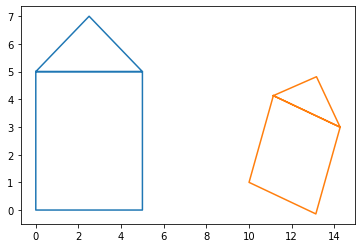

In [17]:
plt.plot(house[0, :], house[1, :])
plt.plot(house4[0, :], house4[1, :])

In [18]:
# rotate around the center

In [20]:
center = house.mean(axis=1, keepdims=True)

In [ ]:
center.shape

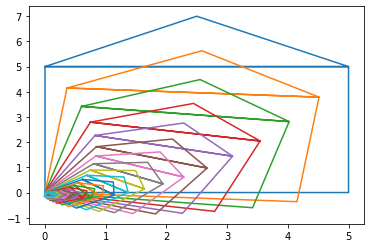

In [29]:
house5 = house # - center

angle = 5 / 180 * np.pi
scale = 1.2

transform = np.array([
    [np.cos(angle), np.sin(angle)], 
    [-np.sin(angle), np.cos(angle)]
]) / scale

for i in range(20):
    plt.plot(house5[0, :], house5[1, :])
    house5 = transform @ house5

# Random walk

Start at (0, 0) and make a step of length 1 in a random direction. 
Repeat 1000 times. Plot your path.

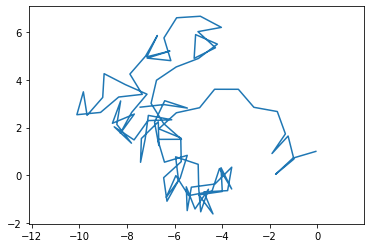

In [78]:
n = 100
for _ in range(1):
    directions = np.random.uniform(-np.pi, +np.pi, n)
    steps = np.stack([np.cos(directions), np.sin(directions)])
    path = np.cumsum(steps, axis=1)
    plt.plot(path[0, :], path[1, :])
    plt.axis('equal');

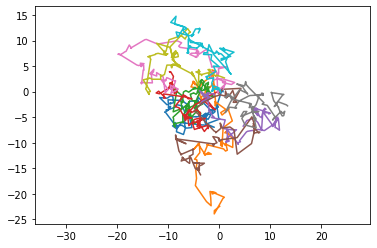

In [80]:
n = 100
for _ in range(10):
    directions = np.random.uniform(-np.pi, +np.pi, n)
    step_size = np.random.exponential(1.0, n)
    step_size = step_size[None, :]
    steps = np.stack([np.cos(directions), np.sin(directions)]) * step_size 
    path = np.cumsum(steps, axis=1)
    plt.plot(path[0, :], path[1, :])
    plt.axis('equal')

[ 0.48970116  1.60297473 -0.83384299]


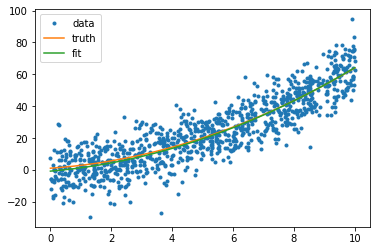

In [152]:
n = 1000
sigma = 10.0
slope = 1.3
offset = 1.0
bend = 0.5

x = np.sort(np.random.uniform(0, 10, n))
y =  bend * x*x + slope * x + offset + np.random.normal(0, sigma, n)
plt.plot(x, y, '.')
p = np.polyfit(x, y, 2)

plt.plot(x, x*x * bend + x*slope + offset)
plt.plot(x, x*x * p[0] + x*p[1] + p[2])
plt.legend(('data', 'truth', 'fit'))
print(p)

In [126]:
x

array([4.80235703e+00, 9.18728166e+00, 9.79114358e+00, 7.37450186e+00,
       3.82801614e+00, 9.47312611e-03, 5.41621398e+00, 6.59043955e+00,
       6.08181127e+00, 3.57330914e+00, 5.55037950e+00, 1.92929744e+00,
       5.80743143e+00, 7.33888898e+00, 1.38708276e+00, 3.17237034e+00,
       6.58973700e+00, 1.86750766e+00, 3.98344593e+00, 8.74317483e+00,
       4.69025504e+00, 8.25959276e+00, 6.82176709e-01, 5.37571782e-01,
       7.32477903e+00, 7.12184775e+00, 5.99870833e-01, 6.88173921e+00,
       4.80308670e+00, 6.18600196e+00])

In [97]:
y

array([ 3.23761505,  2.53145252,  6.64832096, 10.2352824 ,  9.81813769,
       12.56518523,  5.41714636, 11.68586487,  6.2138261 ,  6.37457835,
        6.76914071,  5.49133245,  7.61392884,  8.83420867,  7.19580825,
       -1.35847271, 11.71305208, 13.65248582, -2.18969875, 14.18084597,
        6.89653871,  7.7993315 ,  5.24491879, 11.3135946 ,  7.90597565,
        4.57340259,  6.41426402, 13.98505677, 11.59411094,  8.07418673])

array([1.01644973, 3.00076213])